In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy

In [21]:
combined_data = pd.read_csv("Census_Zillow_Combined_CA.csv")
combined_data.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05


In [20]:
api_key = "288538c4c4aa958caf000f4ac70ef2f0"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

combined_data["Latitude"] = ""
combined_data["Longitude"] = ""
combined_data["Temp"] = ""

for index, row in combined_data.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:
        combined_data.loc[index, "Latitude"] = response["coord"]["lat"]
        combined_data.loc[index, "Longitude"] = response["coord"]["lon"]
        combined_data.loc[index, "Temp"] = response["main"]["temp"]
        
    except:
        pass
    
combined_data.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Latitude,Longitude,Temp
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,33.97,-118.25,83.62
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,34.05,-118.24,84.43
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,34.05,-118.24,84.43
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,34.05,-118.24,84.43
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,34.05,-118.24,84.43


In [14]:
combined_data = combined_data[combined_data["Latitude"] != ""]
combined_data.count()

Zipcode                          1228
City                             1228
State                            1228
CountyName                       1228
Population                       1228
Median Age                       1228
Household Income                 1228
Per Capita Income                1228
Poverty Count                    1228
Poverty Rate                     1228
average rent                     1228
Median Home Value                1228
Number of House Build in year    1228
Avg_HomeValue                    1228
Latitude                         1228
Longitude                        1228
Max Temp                         1228
dtype: int64

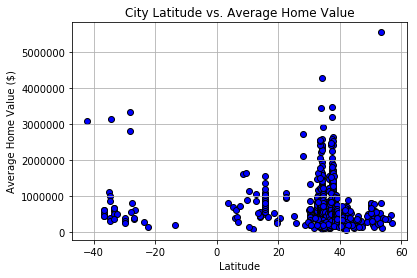

In [15]:
plt.scatter(combined_data["Latitude"], combined_data["Avg_HomeValue"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Average Home Value")
plt.ylabel("Average Home Value ($)")
plt.xlabel("Latitude")
plt.grid(True)

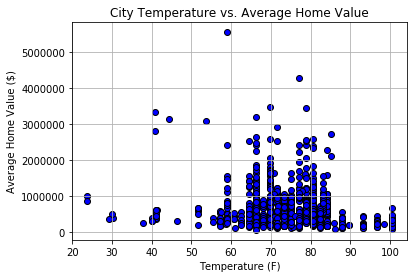

In [16]:
plt.scatter(combined_data["Max Temp"], combined_data["Avg_HomeValue"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Temperature vs. Average Home Value")
plt.ylabel("Average Home Value ($)")
plt.xlabel("Temperature (F)")
plt.grid(True)